# Team 3 Big Data Project

## Project Overview


In [69]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# data_folder = "data/"

# csv_files = []
# for folder in os.listdir(data_folder):
#     for file in os.listdir(os.path.join(data_folder, folder)):
#         if file.endswith(".csv"):
#             csv_files.append(os.path.join(data_folder, folder, file))

# if csv_files:
#     try:
#         # Read all CSV files into dataframes and combine them
#         dataframes = [pd.read_csv(file, header=0) for file in csv_files]
#         combined_df = pd.concat(dataframes, ignore_index=True)

#         # Save the combined dataframe to a single CSV file
#         output_path = "data/combined_pandas.csv"
#         combined_df.to_csv(output_path, index=False)

#         print(f"Combined CSV saved to {output_path}")
#     except Exception as e:
#         print(f"An error occurred: {e}")

In [71]:
df=pd.read_csv("data/combined_pandas.csv", header=0)  # Read the combined CSV file
df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2024-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
1,NaN,2024-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.510372,51.423406,On or near Durley Lane,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
2,NaN,2024-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
3,2eff3ea72aa91fdd06a5fbbb1fb79cb592a6cd5725b4b0...,2024-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.511967,51.412987,On or near Heathfield Close,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,NaN
4,cd58673ba2ea0e0c8aefc2395205efb6ef79a64922a430...,2024-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.513901,51.418814,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
212074,e94ec744f2eb831e7155d55fb31f2ae16f748a4324c94d...,2025-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
212075,3996680500fa7f7cc35ac4e0cba8a89feacba39f049a61...,2025-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
212076,15062da79af0d04d8ad7d7178910726ebf5e40744d9bcd...,2025-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
212077,04f2a5313893fea06ceae7b22e8d17f78a0dffcb69e52b...,2025-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN


In [72]:
# Handle Missing Values
# For Crime Id we will be generating a new id for each missing values
df['Crime ID'] = df['Crime ID'].fillna(value=pd.Series(range(1, len(df) + 1)))

# For Longitude and Latitude we will be filling with the mean value
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())

# For Crime type we set the missing to 'Other'
df['Crime type'] = df['Crime type'].fillna('Other')

# For Last outcome category we will set the missing to 'Other'
df['Last outcome category'] = df['Last outcome category'].fillna('Other')

df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,1,2024-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.492876,51.422716,On or near Trajectus Way,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,Other,NaN
1,2,2024-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.510372,51.423406,On or near Durley Lane,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,Other,NaN
2,3,2024-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.491616,51.424619,On or near Julius Place,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,Other,NaN
3,2eff3ea72aa91fdd06a5fbbb1fb79cb592a6cd5725b4b0...,2024-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.511967,51.412987,On or near Heathfield Close,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,NaN
4,cd58673ba2ea0e0c8aefc2395205efb6ef79a64922a430...,2024-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.513901,51.418814,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Status update unavailable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
212074,e94ec744f2eb831e7155d55fb31f2ae16f748a4324c94d...,2025-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.677138,51.338961,No Location,NaN,NaN,Other crime,Under investigation,NaN
212075,3996680500fa7f7cc35ac4e0cba8a89feacba39f049a61...,2025-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.677138,51.338961,No Location,NaN,NaN,Other crime,Under investigation,NaN
212076,15062da79af0d04d8ad7d7178910726ebf5e40744d9bcd...,2025-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.677138,51.338961,No Location,NaN,NaN,Other crime,Under investigation,NaN
212077,04f2a5313893fea06ceae7b22e8d17f78a0dffcb69e52b...,2025-05,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.677138,51.338961,No Location,NaN,NaN,Other crime,Under investigation,NaN


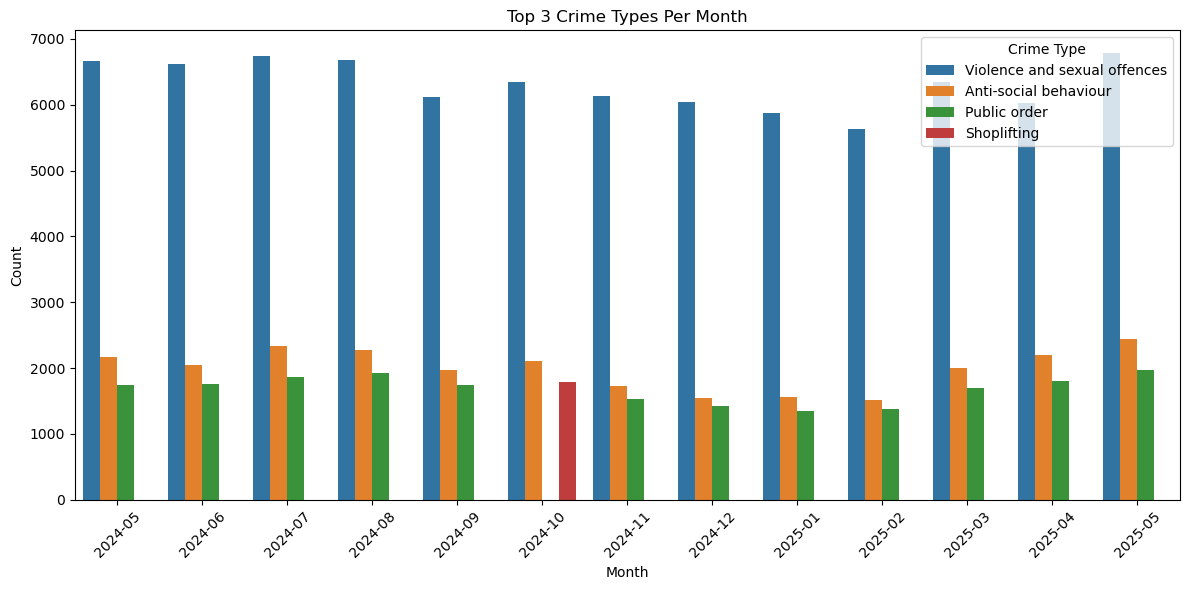

In [73]:
# EDA

## Top Crime Types Per Month
top_crime_types = df.groupby(['Month', 'Crime type']).size().reset_index(name='Count')
top_crime_types = top_crime_types.sort_values(['Month', 'Count'], ascending=[True, False])
top_crime_types = top_crime_types.groupby('Month').head(3)

## Plotting Top 3 Crime Types Per Month
plt.figure(figsize=(12, 6))
sns.barplot(data=top_crime_types, x='Month', y='Count', hue='Crime type')
plt.title('Top 3 Crime Types Per Month')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Crime Type')
plt.tight_layout()
plt.show()

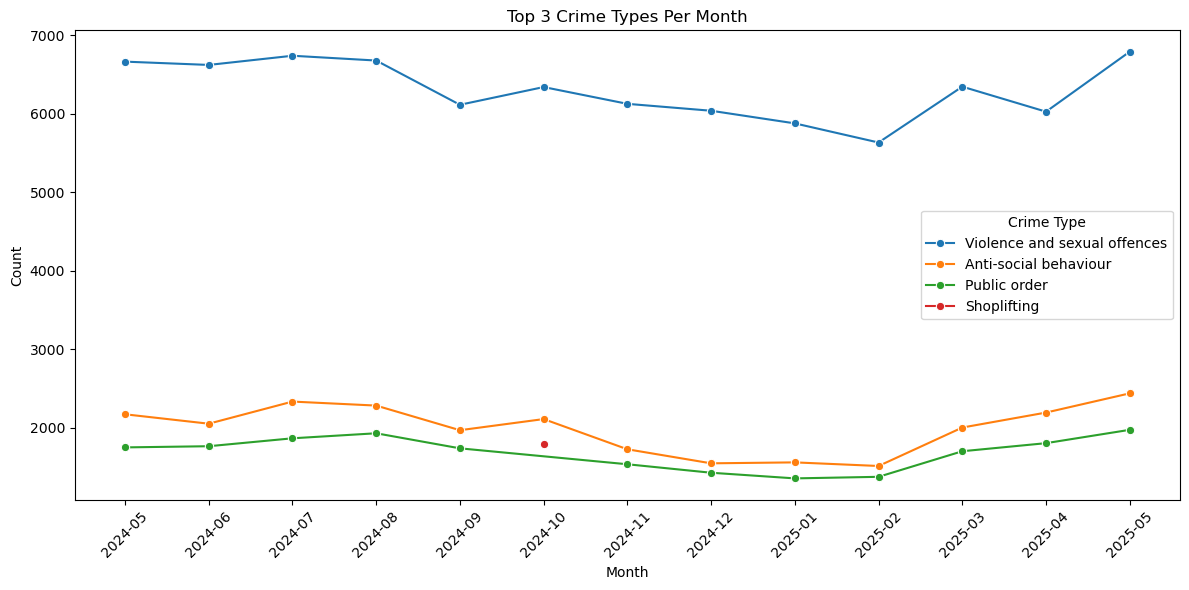

In [74]:
# Line chart for top_crime_types
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_crime_types, x='Month', y='Count', hue='Crime type', marker='o')
plt.title('Top 3 Crime Types Per Month')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Crime Type')
plt.tight_layout()
plt.show()


In [75]:
# Group Data by seasons and ensure to specify the year in the season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter (Dec-Feb)'
    elif month in [3, 4, 5]:
        return 'Spring (Mar-May)'
    elif month in [6, 7, 8]:
        return 'Summer (Jun-Aug)'
    else:
        return 'Autumn (Sep-Nov)'
    
# month is currently yyyy-mm format, we need to extract the month
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m').dt.month
df['Season'] = df['Month'].apply(get_season)

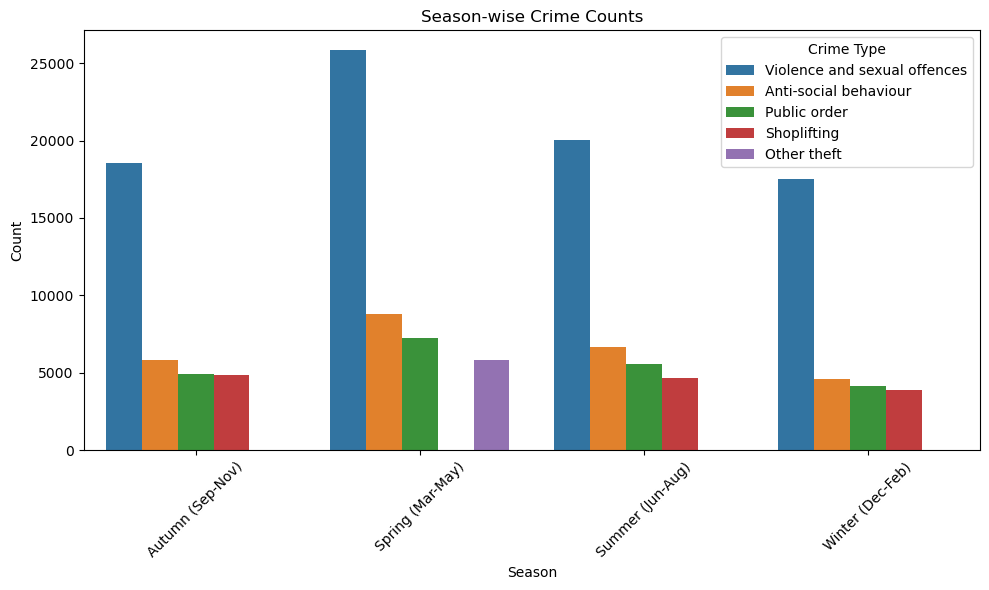

In [81]:
# Group by season and crime type
season_crime_counts = df.groupby(['Season', 'Crime type']).size().reset_index(name='Count').sort_values(['Season', 'Count'], ascending=[True, False])
# Take the top 4 crime types for each season
season_crime_counts = season_crime_counts.groupby('Season').head(4)
# Plotting Season-wise Crime Counts
plt.figure(figsize=(10, 6))
sns.barplot(data=season_crime_counts, x='Season', y='Count', hue='Crime type', palette='tab10')
plt.title('Season-wise Crime Counts')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Crime Type')  
plt.tight_layout()
plt.show()